In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
import scikitplot as skplt

In [2]:
#setting working directory
import os
os.getcwd()
os.chdir('/Users/akailwoo/Desktop/Ounass/DS/20190706_DS_ppt/data')

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
x = df.iloc[:,2:4]
y = df.iloc[:,-1]

In [6]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [9]:
#feature scaling
from sklearn import preprocessing

sc_x = preprocessing.StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

/Users/akailwoo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/akailwoo/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/akailwoo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [10]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver = 'liblinear', random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
# predicting the test set results
y_pred = classifier.predict(x_test)

In [12]:
classifier.score(x_test, y_test)

0.89

In [13]:
classifier.coef_

array([[2.06169269, 1.10338288]])

In [14]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


In [15]:
y_proba = classifier.predict_proba(x_test)
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_proba[:,1], pos_label = 1)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
# Model ROC
print("ROC_AUC:", metrics.roc_auc_score(y_test, y_proba[:,1]))

Accuracy: 0.89
Precision: 0.8888888888888888
Recall: 0.75
ROC_AUC: 0.9540441176470588


In [ ]:
help(LogisticRegression)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


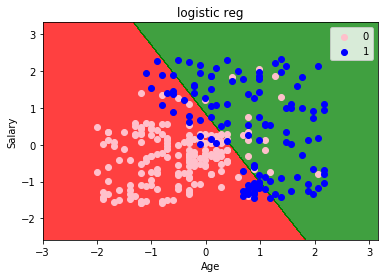

In [16]:
#visualizing results
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min() -1, stop = x_set[:,0].max() +1 , step = 0.01),
                     np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max() +1 , step = 0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
               c = ListedColormap(('pink', 'blue'))(i), label = j)
#     print(i)
#     print(j)
plt.title('logistic reg')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
#get dummies
df = pd.get_dummies(df, columns = ['Gender'])

In [ ]:
x = df.loc[:,['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']]
y = df.loc[:, ['Purchased']]